In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from ISLP import load_data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import SequentialFeatureSelector 
from pygam import LinearGAM, s, f

# Prevent warning messages
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

#### Q10
This question relates to the College data set.

In [2]:
College = pd.read_csv("College.csv")
# Changing the college name from a predictor to just the index
College = College.set_index(['Unnamed: 0']).rename_axis('College')

# Changing qualitative variables to quantitative variables for regression (creating dummy variable)
College['Private'] = College['Private'].replace({'Yes':1,'No':0}).astype(int)

print("There are a total of {0} predictors".format(College.shape[1]))
College.head()

There are a total of 18 predictors


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
College.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [4]:
X = College.drop(columns='Outstate')
y = College['Outstate']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=0)

# Find the best predictors using forward selection, using Linear Regression + 5 fold cross-validation 
model = LinearRegression()
sfs = SequentialFeatureSelector(model, direction='forward', cv=5, scoring='neg_mean_squared_error')
sfs.fit(X_train,y_train)

selected_features = X_train.columns[sfs.get_support()]
print("The selected features are:", ', '.join(selected_features))

The selected features are: Private, P.Undergrad, Room.Board, Personal, Terminal, perc.alumni, Expend, Grad.Rate


(b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

In [5]:
gam = LinearGAM(f(0)+s(7)+s(8)+s(10)+s(12)+s(14)+s(15)+s(16)).fit(X_train,y_train)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     57.1045
Link Function:                     IdentityLink Log Likelihood:                                 -2433.8018
Number of Samples:                          155 AIC:                                             4983.8127
                                                AICc:                                            5055.4374
                                                GCV:                                          7088095.2779
                                                Scale:                                        2631352.9289
                                                Pseudo R-Squared:                                   0.9071
Feature Function                  Lam

C:\Users\srira\AppData\Local\Temp\ipykernel_4724\2178700986.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


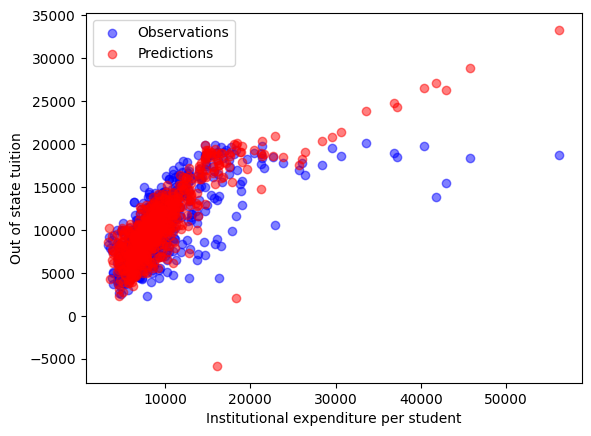

In [6]:
pred = gam.predict(X_test)

# Plot the results as a function of 'Expend' since it has most significant p value 
plt.scatter(X_test['Expend'], y_test, facecolor='blue', alpha=0.5, label='Observations')
plt.scatter(X_test['Expend'], pred, color='red', alpha=0.5, label='Predictions')

plt.xlabel('Institutional expenditure per student')
plt.ylabel('Out of state tuition')
plt.legend()
plt.show()

> Notice that predictions diverge from observations as the value of expenditure increases. Luckily, this doesn't cause problems since the # of high leverage points are low. 

(c) Evaluate the model obtained on the test set, and explain the results obtained.

In [7]:
error = np.sqrt(mean_squared_error(y_test, pred))
print("The GAM results in a RMSE test error of {0}".format(round(error,2)))

The GAM results in a RMSE test error of 2614.43


In [8]:
print("The mean in out of state tuition is {0} with a standard deviation of {1}" 
      .format(np.mean(y_test),np.std(y_test)))
print("Our prediction has mean {0} with a standard deviation of {1}" 
      .format(np.mean(pred),np.std(pred)))

The mean in out of state tuition is 10434.3038585209 with a standard deviation of 3966.7589339187657
Our prediction has mean 10724.983358424624 with a standard deviation of 4305.994075858742


> The predicted mean of state tuition is only 3% away from the true mean, and it has a slightly larger variance. 

(d) For which variables, if any, is there evidence of a non-linear relationship with the response?

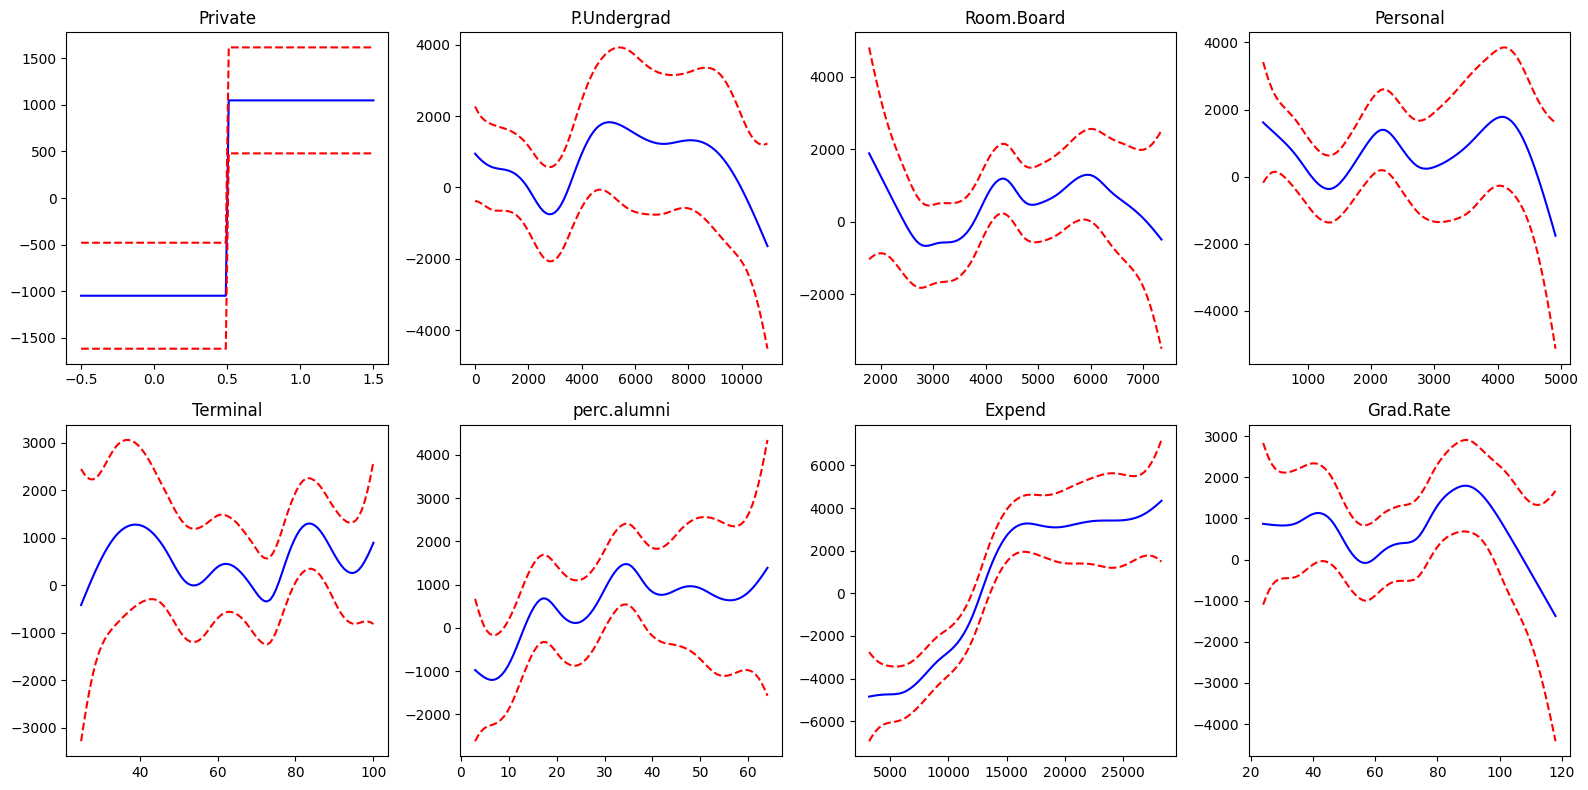

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

predictors = {0: 'Private', 1: 'P.Undergrad', 2: 'Room.Board', 3: 'Personal', 
              4: 'Terminal', 5: 'perc.alumni', 6: 'Expend', 7: 'Grad.Rate'}
keys = list(predictors.keys())

# First row 
for idx, i in enumerate(keys[:4]):
    term = gam.terms[i]
    # Don't plot the intercept term
    if term.isintercept:
        continue
    # Set the limits for x-axis and find partial dependence and confidence interval
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    axes[0, idx].plot(XX[:, term.feature], pdep, color='blue')
    axes[0, idx].plot(XX[:, term.feature], confi, color='red', linestyle='--')
    axes[0, idx].set_title(predictors[i])

# Second row
for idx, i in enumerate(keys[4:]):
    term = gam.terms[i]
    if term.isintercept:
        continue
        
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    
    axes[1, idx].plot(XX[:, term.feature], pdep, color='blue')
    axes[1, idx].plot(XX[:, term.feature], confi, color='red', linestyle='--')
    axes[1, idx].set_title(predictors[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

> While a lot of these plots seem to show evidence of non-linearity, only Private and Expend have statistically significant p values wrt Outstate. 